In [1]:
#hide
!pip install -Uqq fastbook
!pip install -r requirements.txt

import fastbook
fastbook.setup_book()

In [2]:
from pathlib import Path

path = Path('/home/azureuser/cloudfiles/code/Users/theflyingrahul/notebooks/fastbook/mnist_ds/mnist_png')

In [3]:
Path.BASE_PATH = path
path
path.ls()

(#2) [Path('train'),Path('valid')]

In [4]:
from fastbook import *

In [5]:
digits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(),
                 get_y=parent_label,)
dls = digits.dataloaders(path)

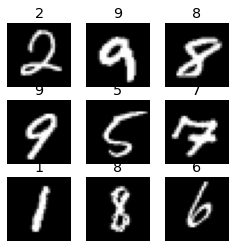

In [6]:
dls.show_batch(max_n=9, figsize=(4,4))

In [7]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/azureuser/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/anaconda/envs/fastai2/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,0.693880,0.453552,0.145200,18:18


epoch,train_loss,valid_loss,error_rate,time
0,0.123637,0.060766,0.019100,15:25
1,0.052667,0.034428,0.010900,15:14


In [9]:
interp = ClassificationInterpretation.from_learner(learn)

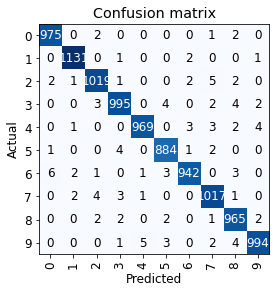

In [11]:
interp.plot_confusion_matrix()

In [12]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.060764,0.044117,0.012600,10:44


epoch,train_loss,valid_loss,error_rate,time
0,0.058285,0.034818,0.011100,10:41


In [13]:
interp = ClassificationInterpretation.from_learner(learn)

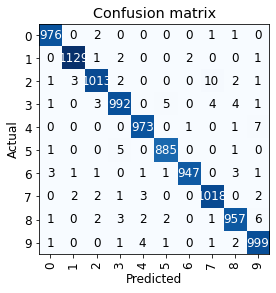

In [14]:
interp.plot_confusion_matrix()

/anaconda/envs/fastai2/lib/python3.7/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


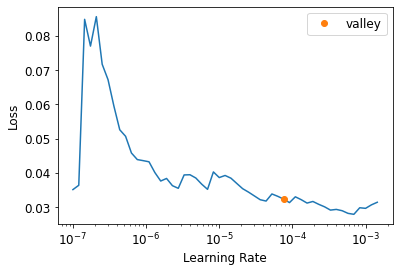

In [15]:
lr_min = learn.lr_find()

In [17]:
lr_min.valley

7.585775892948732e-05

In [18]:
learn.fine_tune(2, base_lr = lr_min.valley)

epoch,train_loss,valid_loss,error_rate,time
0,0.031533,0.033916,0.010500,11:05


epoch,train_loss,valid_loss,error_rate,time
0,0.025540,0.031888,0.009300,11:37
1,0.029994,0.032049,0.010300,11:30


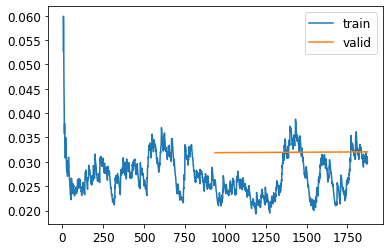

In [19]:
learn.recorder.plot_loss()

/anaconda/envs/fastai2/lib/python3.7/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=9.999999747378752e-06)

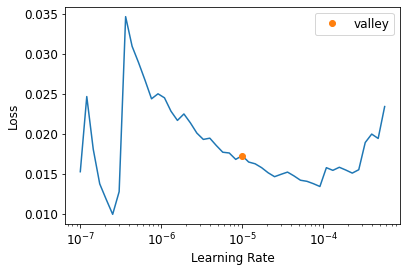

In [20]:
learn.lr_find()

/anaconda/envs/fastai2/lib/python3.7/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


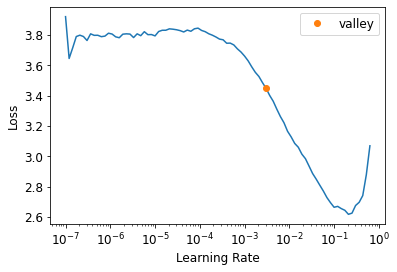

In [22]:
learn2 = cnn_learner(dls, resnet18, metrics=error_rate)
lr2 = learn2.lr_find()


In [23]:
learn2.fit_one_cycle(3, lr2.valley)

epoch,train_loss,valid_loss,error_rate,time
0,0.186467,0.085279,0.027600,10:42
1,0.082436,0.055089,0.018000,10:37
2,0.064855,0.036804,0.011400,10:25


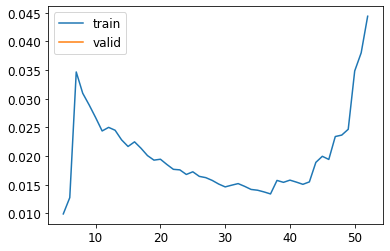

In [24]:
learn.recorder.plot_loss()

In [25]:
learn.unfreeze()

/anaconda/envs/fastai2/lib/python3.7/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


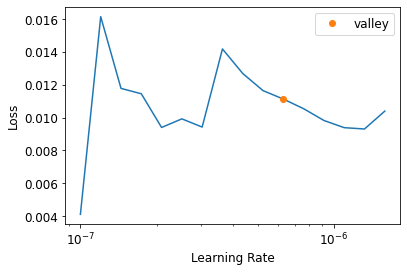

In [26]:
new_lr = learn.lr_find()

In [27]:
learn2.fit_one_cycle(2, lr_max = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.054752,0.036908,0.011500,10:30
1,0.055791,0.038788,0.011800,10:38
